# Unsupervised Learning Introduction

Unsupervised learning deals with unlabeled data. The goal is to find patterns and structure in the data without any explicit instructions. It's particularly useful for data exploration, pattern recognition, and complex data organizatio

## Unsupervised Learning Overview

Unsupervised learning is a type of machine learning where the algorithm is trained on a dataset without predefined labels. The goal is to explore the structure of the data to extract meaningful information without guidance. Unlike supervised learning, unsupervised learning does not aim to predict output labels based on input features but to model the underlying distribution or relationships within the data.

## Key Techniques

### Clustering
Clustering is one of the most common unsupervised learning techniques. It aims to divide the dataset into groups, or "clusters," of similar items based on their features. Common clustering algorithms include K-Means, DBSCAN, and hierarchical clustering.

### Dimensionality Reduction
Dimensionality reduction techniques reduce the number of random variables under consideration, obtaining a set of principal variables. It is crucial for analyzing high-dimensional data. Principal Component Analysis (PCA) and t-SNE are popular methods for dimensionality reduction, helping to visualize high-dimensional data in a lower-dimensional space.

### Applications
- **Market segmentation**: Grouping customers based on purchase history or interactions with products.
- **Anomaly detection**: Identifying unusual data points which could indicate fraud, defects, or outliers.
- **Natural language processing**: Unsupervised techniques like topic modeling help in discovering topics wite.5)
plt.show()
n.


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv')

data.drop('Country', axis=1, inplace = True)

# Quick data inspection
print(data.head())


   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0      1          1          1                        1            1   
1      1          1          1                        1            1   
2      1          1          1                        1            1   
3      1          1          1                        1            1   
4      1          1          1                        1            1   

   None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0             0      1                 1           1         1  ...   
1             0      1                 1           1         1  ...   
2             0      1                 1           1         1  ...   
3             0      1                 1           1         1  ...   
4             0      1                 1           1         1  ...   

   Gender_Female  Gender_Male  Gender_Transgender  Severity_Mild  \
0              0            1                   0              1   
1   

# Dimensionality Reduction with PCA

PCA (Principal Component Analysis) reduces the dimensionality of the data by transforming it into a new set of variables, the principal components, which are uncorrelated and prioritize variance
## Principal Component Analysis (PCA)

**Description:** PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

**Inputs:**
- `data`: The original dataset with features that may be correlated.
- `n_components`: The number of principal components to compute.

**Process:** PCA identifies the axis that accounts for the largest amount of variance in the training data and also orthogonal axes of highest variance, one by one.

**Outputs:**
- Principal components: Transformed attributes that are linearly uncorrelated.
- Explained variance: The amount of variance captured by each principal component.

**Values & Parameters:**
- `n_components`: Can be a fixed number (e.g., 2 for 2D visualization) or a fraction between 0 and 1, indicating the ratio of variance to preserve.

**Typical Use:** Dimensionality reduction for data visualization, noise reduction, or to improve efficiency of other algorithms.
.


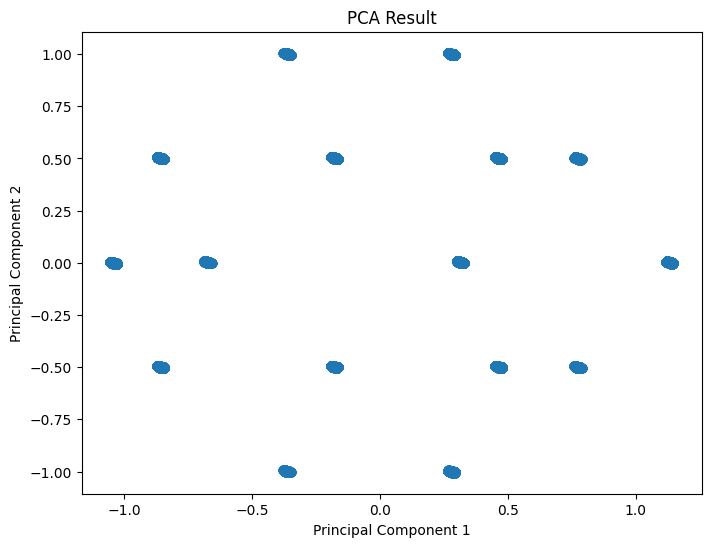

In [2]:
#PCA analysis

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


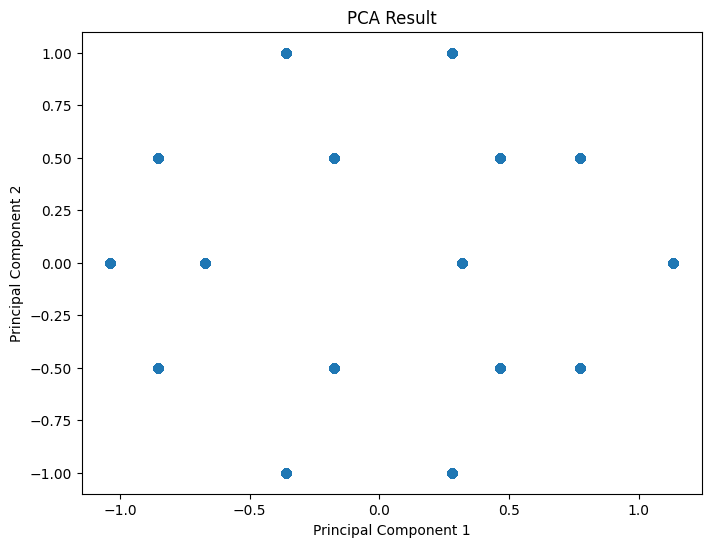

In [3]:
# Apply PCA with 95% variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

# Dimensionality Reduction with t-SNE

t-SNE is a technique for reducing dimensionality that is well suited for visualizing high-dimensional data in a space of two or three dimensio

## t-SNE

**Description:** t-SNE is a non-linear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

**Inputs:**
- `data`: High-dimensional dataset.
- `n_components`: The dimension of the embedded space.

**Process:** t-SNE converts similarities between data points to joint probabilities and tries to minimize the Kullback–Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

**Outputs:**
- The embedded coordinates of the dataset in lower-dimensional space.

**Values & Parameters:**
- `n_components`: Typically set to 2 or 3 for visualization purposes.
- `perplexity`: The balance between local and global aspects of your data, typically chosen between 5 and 50.

**Typical Use:** Visualization of high-dimensional datasets to explore data structures at multiple scales.
s.


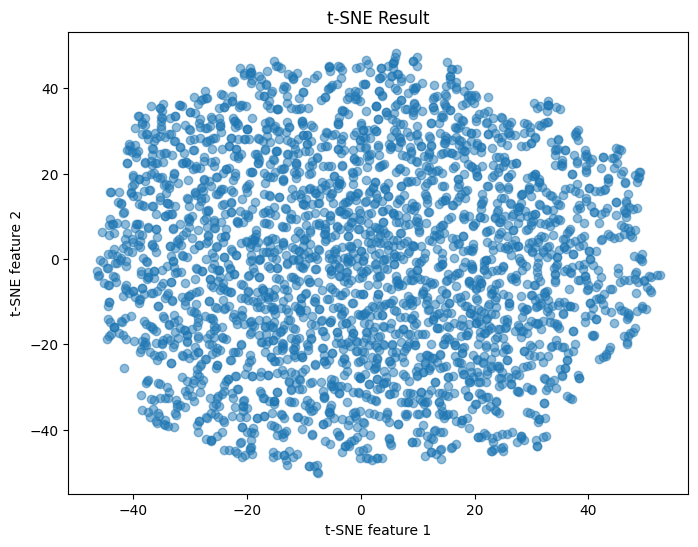

In [4]:
from sklearn.manifold import TSNE

# Considering only 1000 data points 
data_sample = data.sample(n=3000)

# Apply t-SNE with higher perplexity
tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=1000)
data_tsne = tsne.fit_transform(data_sample)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Result')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


# K-Means Clustering

K-Means partitions the observations into k clusters by minimizing variance within each cluste

## K-Means Clustering

**Description:** K-Means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

**Inputs:**
- `data`: Dataset for clustering.
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate.

**Process:** Starts with initial guesses for the centroids, which can either be randomly generated or specified. Then iteratively assigns each data point to its nearest centroid and updates the centroid based on the means of the assigned points.

**Outputs:**
- Cluster labels for the dataset.
- Centroids: The center points of each cluster.

**Values & Parameters:**
- `n_clusters`: Number of desired clusters. Choosing the right number often requires domain knowledge or experimentation.
- `init`: Method for initialization, 'k-means++' is a smart way to speed up convergence.

**Typical Use:** Market segmentation, document clustering, image segmentation, and more.
r.


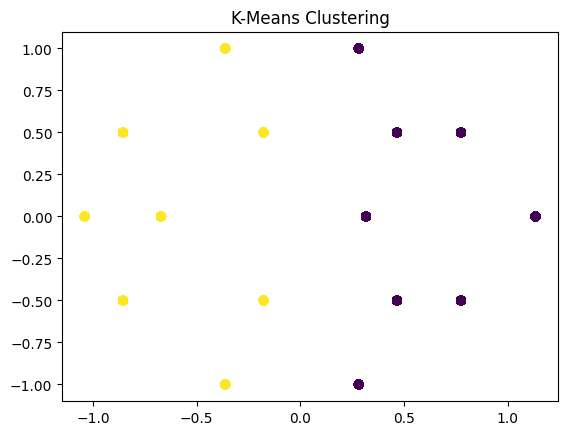

In [5]:
from sklearn.cluster import KMeans

# Sample data (if desired) 
data_sample = data.sample(n=10000)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=2, n_init =10)
clusters = kmeans.fit_predict(data_pca)

clusters_sample = kmeans.fit_predict(data_sample)

# Plot
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, alpha=0.5)
plt.title('K-Means Clustering')
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

silhouette_scores = []  # List to store silhouette scores for different k values

# Loop through number of clusters
for k in range(2, 8):  # Range includes 2 to 7 (7 clusters)
    # Generate clusters for the sampled data
    kmeans = KMeans(n_clusters=k, random_state=2)
    clusters_sample = kmeans.fit_predict(data_sample)

    # Calculate silhouette score for current k
    silhouette_avg = silhouette_score(data_sample, clusters_sample)
    silhouette_scores.append(silhouette_avg)

# Print silhouette scores for each k
print("Silhouette Scores for k=2 to 7:")
for i, score in enumerate(silhouette_scores, start=2):  # Print with corresponding k values
    print(f"k={i} - Silhouette Score: {score}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Silhouette Scores for k=2 to 7:
k=2 - Silhouette Score: 0.0635479803021119
k=3 - Silhouette Score: 0.09760208080288581
k=4 - Silhouette Score: 0.07111583688057767
k=5 - Silhouette Score: 0.06817806620671499
k=6 - Silhouette Score: 0.0723070702908373
k=7 - Silhouette Score: 0.0845563392089762


### Choosing k=3 clusters:

The silhouette scores suggest a relatively small improvement in score as the number of clusters increases beyond 3. While k=7 has the highest score (0.0833), it might not be a significant gain compared to the complexity of interpreting 7 clusters. On the other hand, k=2 offers the lowest score, indicating a potentially poor clustering solution. Therefore, based on this data, k=3 seems like a reasonable compromise, offering a moderate improvement over k=2 and maintaining a manageable number of clusters.

Text(0, 0.5, 'PCA Component 2')

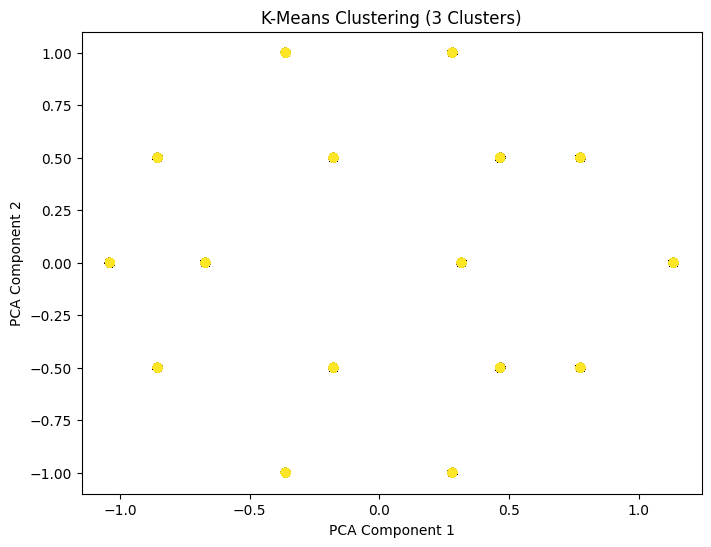

In [7]:
# Apply K-Means clustering for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=2, n_init =10)
clusters = kmeans.fit_predict(data_pca)

# Plot with colormap
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size for better visualization
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=clusters, alpha=0.5, cmap='viridis') 

# Plot
plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')    

# Hierarchical Clustering

This method builds a hierarchy of clusters using a bottom-up approach or a top-down approach
## Hierarchical Clustering

**Description:** Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types: 

- **Agglomerative**: This is a "bottom-up" approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- **Divisive**: A "top-down" approach where all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

**Inputs:**
- `data`: Dataset for clustering.
- `n_clusters`: The number of clusters to find. It can also be left unspecified if the dendrogram is used to choose the number of clusters.

**Process:**
- **Agglomerative**: Initially, each data point is considered as a single cluster. Then, iteratively, the closest (most similar) pairs of clusters are merged until all clusters have been merged into a single cluster that contains all data points.
- **Divisive**: Initially, all data points are considered one big cluster. Then, iteratively, the cluster is split into smaller clusters until each data point is considered its own cluster.

**Outputs:**
- A set of cluster labels for each data point.
- A dendrogram: A tree-like diagram that records the sequences of merges or splits.

**Values & Parameters:**
- `linkage`: The linkage criterion determines the distance between sets of observations as a function of the pairwise distances between observations.
    - `ward`: Minimizes the variance of the clusters being merged.
    - `average`: Uses the average of the distances of each observation of the two sets.
    - `complete`: Uses the maximum distances between all observations of the two sets.
- `n_clusters`: Although not necessary to start the algorithm, specifying this can determine the number of clusters by cutting the dendrogram as('Sample index')
plt.ylabel('Distance')
plt.show()
.


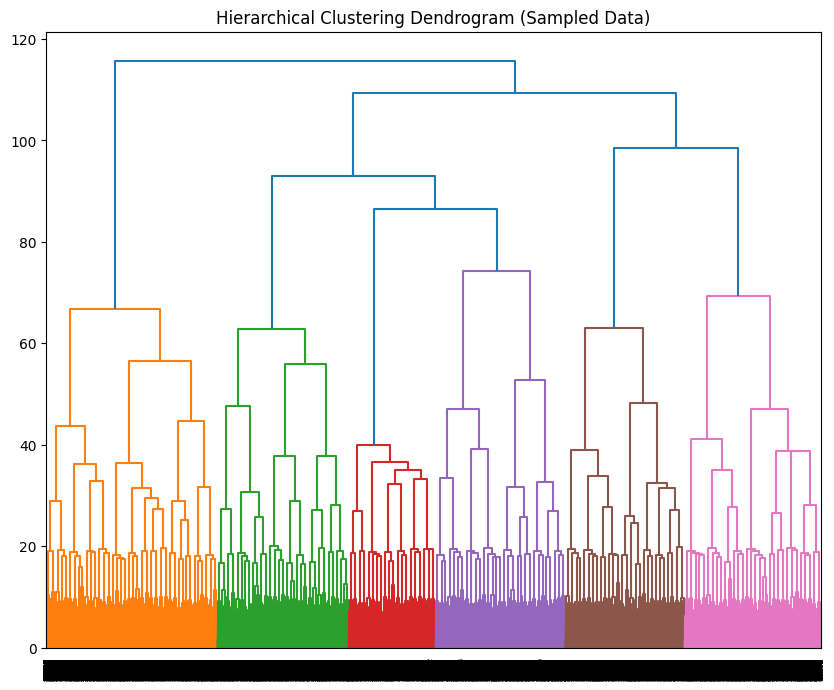

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#I am using 10 sample data, entire data manipulations are too large and take lot of memory to calculate
sampled_indices = np.random.choice(data_pca.shape[0], size=int(data_pca.shape[0] * 0.1), replace=False)
data_sampled = data_pca[sampled_indices, :]

# Generate the linkage matrix on the sampled data
Z = linkage(data_sampled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.show()

# Unsupervised Learning Analysis Overview

## Goal of the Analysis:
The primary objective of this analysis is to explore unsupervised learning techniques to:
- **Discover underlying patterns** in the dataset by identifying how data points group together without pre-existing labels.
- Perform **dimensionality reduction** to reduce the number of features while preserving the variance in the data, making it easier to visualize and understand.
- **Cluster** similar data points together based on their features to uncover structure or segments within the data.

## Features Used in the Analysis:
The analysis operates on a set of features from the dataset (`Cleaned-Data.csv`), which include measurements or characteristics of observations. The features used are integral for:
- **PCA (Principal Component Analysis)** and **t-SNE** to transform the data into a lower-dimensional space while attempting to preserve the original structure or variance.
- **K-Means Clustering, DBSCAN**, and **Hierarchical Clustering** to identify clusters based on either the original features or the transformed features, using all numerical features that capture differences between observations.

## Results Interpretation:
1. **PCA & t-SNE**: Provide a new representation of the data in 2D or 3D for visualization, where proximity of points indicates similarity. Clusters becoming visible in these plots suggest groups of similar observations.

2. **K-Means Clustering**: Results in cluster labels for each observation, showing group belongingness. Visualization of these clusters on PCA or t-SNE plots can demonstrate the separation quality of clusters.

3. **DBSCAN**: Identifies core and border points of clusters and marks outliers, indicating both groupings and anomalies in the data. This is useful for identifying noise or atypical observations.

4. **Hierarchical Clustering**: Produces a dendrogram showing the hierarchical relationships between observations, allowing for decisions on the number of clusters by cutting the dendrogram at a desired level.

## Analytical Value Achieved:
- **Understanding Data Structure**: These techniques unveil the data's structure, revealing natural groupings, outliers, or patterns not evident without analysis.
- **Informing Further Analysis or Decision-making**: Identified clusters may correspond to meaningful segments, guiding targeted strategies or further analysis.
- **Feature Selection and Reduction**: PCA and t-SNE can inform feature selection in supervised learning tasks or simplify datasets by highlighting important features.

Through this unsupervised learning analysis, we gain insights into the inherent structure of the dataset, invaluable for exploratory data analysis, preprocessing for further analysis, or deriving direct insights into the observed phenomena.
